<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Regressão Linear Múltipla

## Case 1: Salários de CEOs

Uma consultoria americana foi contratada para estimar o efeito da valor de mercado sobre o salário do CEO de empresas americanas. O cliente sugeriu o seguinte modelo:

 salario = ${\beta}_{0}+{\beta}_{1}*anos empresa + {\beta}_{2}*anos como ceo + {\beta}_{3}*vendas totais + {\beta}_{4}*valuation + {\beta}_{5}*margem  $

em que:

`anos empresa` são os anos totais de trabalho na empresa;<br>
`anos como ceo` são os anos de trabalhando como CEO na empresa;<br>
`vendas totais` são as vendas totais da empresa, em milhões de dólares;<br>
`valuation` é o valor de mercado da empresa, em milhões de dólares; ⁡<br>
`margem` é o lucro como porcentagem das vendas;

Com posse da base fornecida pelo cliente `salario_ceo.csv`, responda:

**É possível estimar o salário de CEOs a partir das variáveis fornecidas?**

### Importação das bibliotecas

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de data science
import statsmodels.api as sm

### Importação da base de dados

In [2]:
df_salarioCEO_original = pd.read_csv('salario_ceo.csv' , delimiter=';')

### Análise Exploratória de Dados

In [3]:
df_salarioCEO_original.head(20)

,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem
0,9,2,1161,6200,23200,15.6
1,10,10,600,283,1100,17.0
2,9,3,378,169,1100,23.7
3,22,22,650,1100,999,-4.9
4,8,6,496,350,387,8.0
5,7,7,1066,18999,3900,3.2
6,35,10,945,535,622,4.5
7,32,8,1260,4799,2100,4.0
8,4,4,502,610,453,1.1
9,39,5,1094,2899,3900,7.9


In [4]:
df_salarioCEO_original.describe()

,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,22.502825,7.954802,865.344633,3528.983051,3599.875706,6.423729
std,12.294735,7.150826,587.637837,6088.636588,6442.307591,17.864245
min,2.000000,0.000000,99.000000,29.000000,387.000000,-203.100000
25%,12.000000,3.000000,470.000000,561.000000,644.000000,4.200000
50%,23.000000,6.000000,707.000000,1399.000000,1200.000000,6.800000
75%,33.000000,11.000000,1119.000000,3500.000000,3500.000000,10.900000
max,58.000000,37.000000,5299.000000,51300.000000,45400.000000,47.500000


**<span style="color:red">Comentários Itano</span>**<br>
* É interessante registrar o que você extraiu de insights das tabelas, pois apesar de ser super importante fazermos as tabelas corretamente, o maior valor está em analisá-las.
</span>

### Comente sobre os sinais esperados dos coeficientes, justificando suas respostas. 

`Dica :` Faça uma análise de dispersão gráfica e usando matriz de correlação.

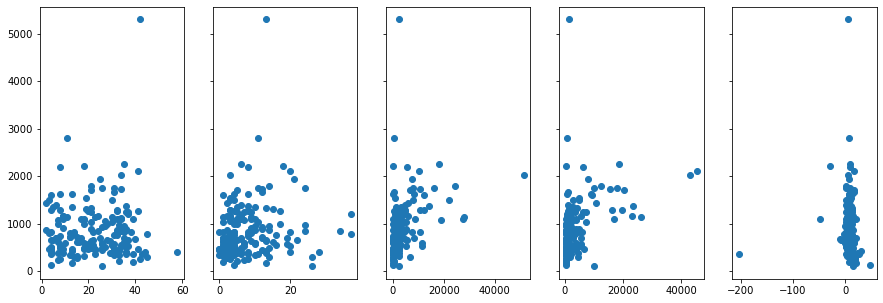

In [5]:
# Análise de Dispersão Gráfica
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, sharey=True, figsize=(15,5))
ax1.scatter(df_salarioCEO_original['anos_empresa'], df_salarioCEO_original['salario']);
ax2.scatter(df_salarioCEO_original['anos_como_ceo'], df_salarioCEO_original['salario']);
ax3.scatter(df_salarioCEO_original['vendas_totais'], df_salarioCEO_original['salario']);
ax4.scatter(df_salarioCEO_original['valuation'], df_salarioCEO_original['salario']);
ax5.scatter(df_salarioCEO_original['margem'], df_salarioCEO_original['salario']);

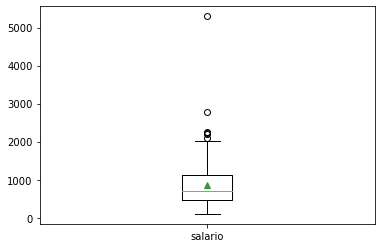

In [6]:
# Análise do boxplot salario
plt.boxplot(df_salarioCEO_original['salario'], showmeans=True, labels=['salario']);

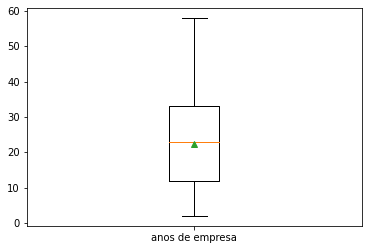

In [7]:
# Análise do boxplot anos_empresa
plt.boxplot(df_salarioCEO_original['anos_empresa'], showmeans=True, labels=['anos de empresa']);

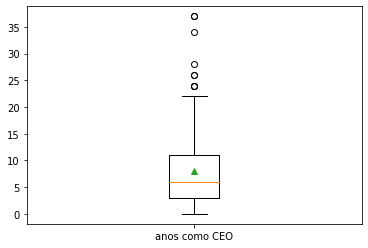

In [8]:
# Análise do boxplot anos_como_ceo
plt.boxplot(df_salarioCEO_original['anos_como_ceo'], showmeans=True, labels=['anos como CEO']);

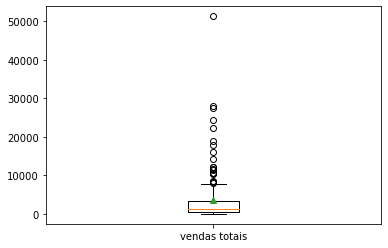

In [9]:
# Análise do boxplot vendas_totais
plt.boxplot(df_salarioCEO_original['vendas_totais'], showmeans=True, labels=['vendas totais']);

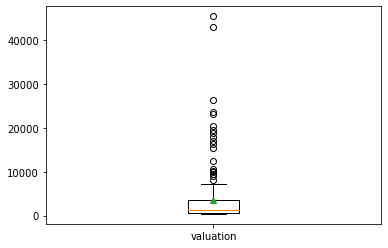

In [10]:
# Análise do boxplot valuation
plt.boxplot(df_salarioCEO_original['valuation'], showmeans=True, labels=['valuation']);

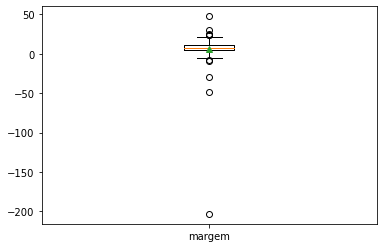

In [11]:
# Análise do boxplot margem
plt.boxplot(df_salarioCEO_original['margem'], showmeans=True, labels=['margem']);

**<span style="color:red">Comentários Itano</span>**<br>
* Excelente ter incluído os boxplots Leo!! O que você encontrou analisando-os? Existem outliers? Eles podem impactar de forma significativa o modelo?
</span>

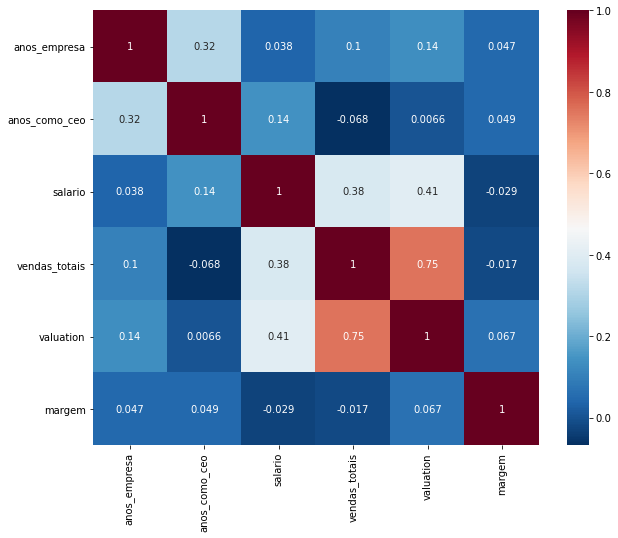

In [12]:
# Matriz de Correlação
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_salarioCEO_original.corr(), cmap='RdBu_r', annot=True);

Comentários sobre os Sinais Esperados do Coeficientes<br>
Analisando os __gráficos de dispersão__ e a __matriz de correlação__, identificamos que:

1. __Anos de Empresa__ : coeficiente positivo mas próximo de zero
2. __Anos como CEO__ : coeficiente positivo, com aparente correlação muito fraca
3. __Vendas Totais__ : coeficiente positivo, com aparente correlação fraca
4. __Valuation__ : coeficiente positivo, com aparente correlação média
5. __Margem__ : coeficiente negativo, mas próximo de zero. Aparentemente o valor da correlação não parece condizer com a lógica do negócio, espera-se que quanto mais resultado um CEO alcança, maior seria seu salário.

**<span style="color:red">Comentários Itano</span>**<br>
* Boas análises!
* Como sugestão, você pode começar a comentar pelas variáveis mais importantes, pois são elas que trarão maior valor na construção do modelo.
</span>

### Ajuste um modelo de Regressão Linear Múltipla com as variáveis sugeridas pela consultoria

In [13]:
# Variável resposta
y_consultoria = df_salarioCEO_original['salario']

# Variáveis explicativas
df_salarioCEO_original['intercepto'] = 1
x_consultoria = df_salarioCEO_original[ ['intercepto', 'anos_empresa', 'anos_como_ceo', 'vendas_totais', 'valuation', 'margem'] ]

# Ajusta o modelo e retorna os resultados
modelo_consultoria = sm.OLS(y_consultoria, x_consultoria)
resultado_consultoria = modelo_consultoria.fit()
print(resultado_consultoria.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     9.017
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.26e-07
Time:                        19:54:02   Log-Likelihood:                -1358.5
No. Observations:                 177   AIC:                             2729.
Df Residuals:                     171   BIC:                             2748.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercepto      682.2568     88.841      7.680

### O sinal dos coeficientes estimados associados às variáveis `anos empresa` e `margem` estão de acordo com o esperado? Justifique.

A equação de regressão linear encontrada considerando os dados disponibilizados, e seguindo o modelo inicial proposta pela consultoria é:  
Y(salario) = 682,26 - 3,54*anos_empresa + 14,80*anos_como_ceo + 0,02*vendas_totais + 0,02*valuation - 1,62*margem

Análise das variáveis:
1. __Intercepto__ = 682,26 é o salário médio de um CEO novo na empresa, sem nenhum ano como ceo e que tenha vendas totais, valuation e margem considerandos como zero  
2. __anos de empresa__ = -3,54 é a redução média no salário do CEO para cada ano adicional de empresa, com as outras variáveis constantes. O sinal do coeficiente da variável "anos_empresa" não está conforme esperado (esperava-se que anos de empresa aumentassem o salário)
3. __anos como CEO__ = 14,80 é o aumento médio no salário do CEO para cada ano adicional como CEO, com as outras variáveis constantes. O sinal do coeficiente da variável "anos_como_CEO" está conforme esperado
4. __vendas totais__ = 0,02 é o aumento médio no salário do CEO para cada unidade de venda adicional, com as outras variáveis constantes. O sinal do coeficiente da variável "vendas_totais" está conforme esperado, no entanto o valor de acrésimo é muito pequeno
5. __valuation__ = 0,02 é o aumento médio no salário do CEO para cada unidade de valuation adicional, com as outras variáveis constantes. O sinal do coeficiente da variável "valuation" está conforme esperado, no entanto o valor de acrésimo é muito pequeno
6. __margem__ = -1,62 é a redução média no salário do CEO para cada unidade de margem adicional, com as outras variáveis constantes. O sinal do coeficiente da variável "margem", apesar de estar conforme a correlação calculada, não parece estar de acordo com o que a lógica nos diz (esperava-se que maiores margens indicassem um salário maior)

**<span style="color:red">Comentários Itano</span>**<br>
* Muito bom ter colocado as interpretações Leo! Sugiro substituir o trecho "para cada unidade de venda adicional" por "para cada 1 milhão adicional em vendas", pois fica mais fácil de transmitir a informação com as áreas de negócios. O mesmo se aplica as demais variáveis.
</span>

### Avalie a qualidade do modelo de regressão linear múltipla proposto. Ele é estatísticamente significante?

`Dica :` Verifique o R Quadrado ajustado do modelo e também o p-valor dos coeficientes.
O modelo apresenta um R2 ajustado de 0,186. Isso indica que o poder de explicação do modelo com as variáveis propostas pela consultoria é fraco (cerca de 19%).  

Sobre os p valores encontrados temos as análises abaixo:  
__OBS.__: lembrando que a hipótese nula (H0) do teste é se o coeficiente é igual a zero na população, assim se a hipótese for plausível a variável explicativa não tem contribuição no modelo. Vamos considerar como sendo um H0 plausível p valores maiores que 0,05
1. __anos de empresa__ = p valor igual a 0,308, hipótese nula plausível (estatisticamente a variável não contribui para o modelo)
2. __anos como CEO__ = p valor igual a 0,014, hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
3. __vendas totais__ = p valor igual a 0,066, hipótese nula plausível (estatisticamente a variável não contribui para o modelo)
4. __valuation__ = p valor igual a 0,010, hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
5. __margem__ = p valor igual a 0,475, hipótese nula plausível (estatisticamente a variável não contribui para o modelo)

Ou seja, pela análise dos P valores de cada variável, chegamos à conclusão de que as variáveis "anos_empresa", "vendas_totais", "margem" estatisticamente não contribuem para o modelo.  
A seguir vamos estudar a retirada das mesmas do modelo e avaliar o impacto no R2 ajustado.

**<span style="color:red">Comentários Itano</span>**<br>
* Ótima análise!
* Na conclusão, lembre-se de que caso tenhamos mais de uma variável não significativa, essa análise precisa ser feita uma a uma. Ou seja, pode ser que excluindo a variável **margem**, que possui o maior p-valor, a variável **anos de empresa** passe a ser significativa.
</span>

### Realize os ajustes necessários no modelo, removendo variáveis que não sejam estatisticamente significantes até que o modelo resultante esteja adequado.

`Dica :` Quando for excluir variáveis explicativas, remova-as uma de cada vez para garantir que está realizando a análise correta para a remoção.

#### AJUSTE 1: Removendo a variável "anos_empresa" do modelo

In [14]:
# Variável resposta
y_ajuste_1 = df_salarioCEO_original['salario']

# Variáveis explicativas
x_ajuste_1 = df_salarioCEO_original[ ['intercepto', 'anos_como_ceo', 'vendas_totais', 'valuation', 'margem'] ]

# Ajusta o modelo e retorna os resultados
modelo_ajuste_1 = sm.OLS(y_ajuste_1, x_ajuste_1)
resultado_ajuste_1 = modelo_ajuste_1.fit()
print(resultado_ajuste_1.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     11.01
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           5.69e-08
Time:                        19:54:14   Log-Likelihood:                -1359.1
No. Observations:                 177   AIC:                             2728.
Df Residuals:                     172   BIC:                             2744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercepto      622.0397     66.472      9.358

**<span style="color:red">Comentários Itano</span>**<br>
* No processo de exclusão das variáveis, sempre inicie pela menos significativa, ou seja, aquela que possui o maior p-valor, caso contrário o processo de eliminação das variáveis pode excluir uma que seja importante para o modelo.
</span>

#### AJUSTE 2: Removendo a variável "anos_empresa" e "vendas_totais" do modelo

In [15]:
# Variável resposta
y_ajuste_2 = df_salarioCEO_original['salario']

# Variáveis explicativas
x_ajuste_2 = df_salarioCEO_original[ ['intercepto', 'anos_como_ceo', 'valuation', 'margem'] ]

# Ajusta o modelo e retorna os resultados
modelo_ajuste_2 = sm.OLS(y_ajuste_2, x_ajuste_2)
resultado_ajuste_2 = modelo_ajuste_2.fit()
print(resultado_ajuste_2.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     13.42
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           6.51e-08
Time:                        19:54:18   Log-Likelihood:                -1360.7
No. Observations:                 177   AIC:                             2729.
Df Residuals:                     173   BIC:                             2742.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercepto      650.5053     64.994     10.009

#### AJUSTE 3: Removendo a variável "anos_empresa", "vendas_totais" e "margem" do modelo

In [16]:
# Variável resposta
y_ajuste_3 = df_salarioCEO_original['salario']

# Variáveis explicativas
x_ajuste_3 = df_salarioCEO_original[ ['intercepto', 'anos_como_ceo', 'valuation'] ]

# Ajusta o modelo e retorna os resultados
modelo_ajuste_3 = sm.OLS(y_ajuste_3, x_ajuste_3)
resultado_ajuste_3 = modelo_ajuste_3.fit()
print(resultado_ajuste_3.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     19.72
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.92e-08
Time:                        19:54:21   Log-Likelihood:                -1361.1
No. Observations:                 177   AIC:                             2728.
Df Residuals:                     174   BIC:                             2738.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercepto      640.4990     64.055      9.999

**<span style="color:red">Comentários Itano</span>**<br>
* Muito bom você ter mantido o histórico das alterações ao invés de colocar apenas a versão final. Isso é bastante importante para manter a rastreabilidade e documentação do processo.
</span>

### Interprete os coeficientes do modelo em termos do problema de negócio.

Mesmo retirando as três variáveis que estatisticamente não contribuiam com o modelo, o R quadrado ajustado continua baixo (0,175).  
No entanto o H0 dos testes de hipótese das duas variáveis do modelo do terceiro ajuste mostram que as mesmas estatisticamente contribuem para o modelo:
1. __anos como CEO__: p valor igual a 0,042. Hipótese não plausível (estatisticamente a variável contribui para o modelo)
2. __valuation__: p valor igual a 0. Hipótese não plausível (estatisticamente a variável contribui para o modelo)

**<span style="color:red">Comentários Itano</span>**<br>
* Ao terminar o processo de eliminação das variáveis e encontrar o melhor modelo, é importante interpretar novamente os coeficientes por 2 motivos: 
    1. Validar que os valores encontrados estão coerentes.
    2. Comunicar aos analistas de negócios quais as relações modeladas.
</span>

### É possível melhorar a qualidade do ajuste do modelo? Isto é, melhorar o R Quadrado ajustado?

`Dica :` Muitas vezes a variável resposta não é correlacionada linearmente com as variáveis explicativas (features). Isso acontece pois as features podem ter outra relação de linearidade, como por exemplo a log-linear. Desta forma, é útil tentar ajustar um modelo log-linear, da seguinte forma:

log(salario) = ${\beta}_{0}+{\beta}_{1}*log(anos empresa) + {\beta}_{2}*log(anos como ceo) + {\beta}_{3}*log(vendas totais) + {\beta}_{4}*log(valuation) + {\beta}_{5}*log(margem)  $

Nem todas as varíaves ficaram melhores usando log. Portanto, é útil misturar features com e sem transformações de log. Veja exemplo: 

log(salario) = ${\beta}_{0}+{\beta}_{1}*anos empresa + {\beta}_{2}*anos como ceo+ {\beta}_{3}*log(vendas totais) + {\beta}_{4}*log(valuation) + {\beta}_{5}*margem  $

In [17]:
# Copiando o data frame original para um novo ajustado, que irá receber as variáveis com seus LOGS calculados 
df_salarioCEO_ajustada = df_salarioCEO_original
df_salarioCEO_ajustada.head(20)

,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem,intercepto
0,9,2,1161,6200,23200,15.6,1
1,10,10,600,283,1100,17.0,1
2,9,3,378,169,1100,23.7,1
3,22,22,650,1100,999,-4.9,1
4,8,6,496,350,387,8.0,1
5,7,7,1066,18999,3900,3.2,1
6,35,10,945,535,622,4.5,1
7,32,8,1260,4799,2100,4.0,1
8,4,4,502,610,453,1.1,1
9,39,5,1094,2899,3900,7.9,1


In [18]:
df_salarioCEO_ajustada['ln_salario'] = np.log(df_salarioCEO_ajustada['salario'])
df_salarioCEO_ajustada['ln_anos_empresa'] = np.log(df_salarioCEO_ajustada['anos_empresa']+1)
df_salarioCEO_ajustada['ln_anos_como_ceo'] = np.log(df_salarioCEO_ajustada['anos_como_ceo']+1)
df_salarioCEO_ajustada['ln_vendas_totais'] = np.log(df_salarioCEO_ajustada['vendas_totais']+1)
df_salarioCEO_ajustada['ln_valuation'] = np.log(df_salarioCEO_ajustada['valuation']+1)
df_salarioCEO_ajustada['ln_margem'] = np.log(df_salarioCEO_ajustada['margem']+1)
df_salarioCEO_ajustada.sort_values(by=['ln_margem'])

d:\venv\pred_64\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem,intercepto,ln_salario,ln_anos_empresa,ln_anos_como_ceo,ln_vendas_totais,ln_valuation,ln_margem
51,18,7,600,11699,3999,-0.3,1,6.396930,2.944439,2.079442,9.367344,8.294050,-0.356675
80,27,14,950,2600,1500,0.2,1,6.856462,3.332205,2.708050,7.863651,7.313887,0.182322
100,26,11,1748,8099,9999,0.5,1,7.466228,3.295837,2.484907,8.999619,9.210340,0.405465
115,22,2,558,2100,686,0.6,1,6.324359,3.135494,1.098612,7.650169,6.532334,0.470004
42,3,3,1487,22200,2800,0.8,1,7.304516,1.386294,1.386294,10.007893,7.937732,0.587787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,28,5,650,5699,816,-7.7,1,6.476972,3.367296,1.791759,8.648221,6.705639,NaN
113,40,6,678,4899,1399,-9.4,1,6.519147,3.713572,1.945910,8.496990,7.244228,NaN
146,18,6,1100,563,543,-48.1,1,7.003065,2.944439,1.945910,6.335054,6.298949,NaN
167,4,1,369,64,1200,-203.1,1,5.910797,1.609438,0.693147,4.174387,7.090910,NaN


In [19]:
# Verificando valores missing (NaN)
df_salarioCEO_ajustada.isna().sum()

# Como vemos abaixo, somente a variável "ln_margem" aresenta valores missing

anos_empresa        0
anos_como_ceo       0
salario             0
vendas_totais       0
valuation           0
margem              0
intercepto          0
ln_salario          0
ln_anos_empresa     0
ln_anos_como_ceo    0
ln_vendas_totais    0
ln_valuation        0
ln_margem           8
dtype: int64

In [20]:
# Avaliando os valores NaN da variável "ln_margem"
df_salarioCEO_ajustada.describe()

,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem,intercepto,ln_salario,ln_anos_empresa,ln_anos_como_ceo,ln_vendas_totais,ln_valuation,ln_margem
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,169.000000
mean,22.502825,7.954802,865.344633,3528.983051,3599.875706,6.423729,1.0,6.581902,2.964321,1.894496,7.232249,7.399896,2.055773
std,12.294735,7.150826,587.637837,6088.636588,6442.307591,17.864245,0.0,0.606844,0.692710,0.799650,1.430173,1.133124,0.668800
min,2.000000,0.000000,99.000000,29.000000,387.000000,-203.100000,1.0,4.595120,1.098612,0.000000,3.401197,5.961005,-0.356675
25%,12.000000,3.000000,470.000000,561.000000,644.000000,4.200000,1.0,6.152733,2.564949,1.386294,6.331502,6.469250,1.686399
50%,23.000000,6.000000,707.000000,1399.000000,1200.000000,6.800000,1.0,6.561031,3.178054,1.945910,7.244228,7.090910,2.104134
75%,33.000000,11.000000,1119.000000,3500.000000,3500.000000,10.900000,1.0,7.020191,3.526361,2.484907,8.160804,8.160804,2.501436
max,58.000000,37.000000,5299.000000,51300.000000,45400.000000,47.500000,1.0,8.575273,4.077537,3.637586,10.845466,10.723289,3.881564


In [21]:
# Substituindo os valores NaN da variável "ln_margem" pela sua média.
df_salarioCEO_ajustada = df_salarioCEO_ajustada.fillna(df_salarioCEO_ajustada['ln_margem'].mean())
df_salarioCEO_ajustada.isna().sum()

anos_empresa        0
anos_como_ceo       0
salario             0
vendas_totais       0
valuation           0
margem              0
intercepto          0
ln_salario          0
ln_anos_empresa     0
ln_anos_como_ceo    0
ln_vendas_totais    0
ln_valuation        0
ln_margem           0
dtype: int64

**<span style="color:red">Comentários Itano</span>**<br>
* Excelente ter tido o cuidado de olhar as variáveis após a transformação!!! E também ter proposto substituir os valores missing pela média do ln_margem. Por ter feito a imputação, vale a pena analisar o impacto desse tratamento na distribuição da variável ln_margem.
</span>

In [23]:
# Avaliando os dados após o tratamento dos valores NaN da variável "ln_margem"
df_salarioCEO_ajustada.describe()

,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem,intercepto,ln_salario,ln_anos_empresa,ln_anos_como_ceo,ln_vendas_totais,ln_valuation,ln_margem
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,22.502825,7.954802,865.344633,3528.983051,3599.875706,6.423729,1.0,6.581902,2.964321,1.894496,7.232249,7.399896,2.055773
std,12.294735,7.150826,587.637837,6088.636588,6442.307591,17.864245,0.0,0.606844,0.692710,0.799650,1.430173,1.133124,0.653423
min,2.000000,0.000000,99.000000,29.000000,387.000000,-203.100000,1.0,4.595120,1.098612,0.000000,3.401197,5.961005,-0.356675
25%,12.000000,3.000000,470.000000,561.000000,644.000000,4.200000,1.0,6.152733,2.564949,1.386294,6.331502,6.469250,1.686399
50%,23.000000,6.000000,707.000000,1399.000000,1200.000000,6.800000,1.0,6.561031,3.178054,1.945910,7.244228,7.090910,2.055773
75%,33.000000,11.000000,1119.000000,3500.000000,3500.000000,10.900000,1.0,7.020191,3.526361,2.484907,8.160804,8.160804,2.476538
max,58.000000,37.000000,5299.000000,51300.000000,45400.000000,47.500000,1.0,8.575273,4.077537,3.637586,10.845466,10.723289,3.881564


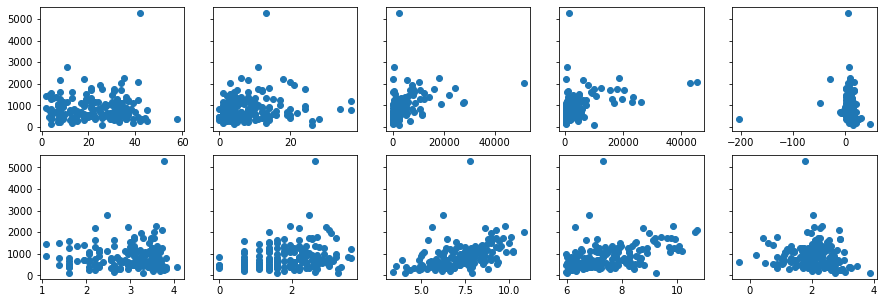

In [24]:
fig, ((ax1,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,sharey=True,figsize=(15,5))

ax1.scatter(df_salarioCEO_ajustada['anos_empresa'],df_salarioCEO_ajustada['salario']);
ax2.scatter(df_salarioCEO_ajustada['anos_como_ceo'],df_salarioCEO_ajustada['salario']);
ax3.scatter(df_salarioCEO_ajustada['vendas_totais'],df_salarioCEO_ajustada['salario']);
ax4.scatter(df_salarioCEO_ajustada['valuation'],df_salarioCEO_ajustada['salario']);
ax5.scatter(df_salarioCEO_ajustada['margem'],df_salarioCEO_ajustada['salario']);

ax6.scatter(df_salarioCEO_ajustada['ln_anos_empresa'],df_salarioCEO_ajustada['salario'])
ax7.scatter(df_salarioCEO_ajustada['ln_anos_como_ceo'],df_salarioCEO_ajustada['salario'])
ax8.scatter(df_salarioCEO_ajustada['ln_vendas_totais'],df_salarioCEO_ajustada['salario'])
ax9.scatter(df_salarioCEO_ajustada['ln_valuation'],df_salarioCEO_ajustada['salario'])
ax10.scatter(df_salarioCEO_ajustada['ln_margem'],df_salarioCEO_ajustada['salario']);

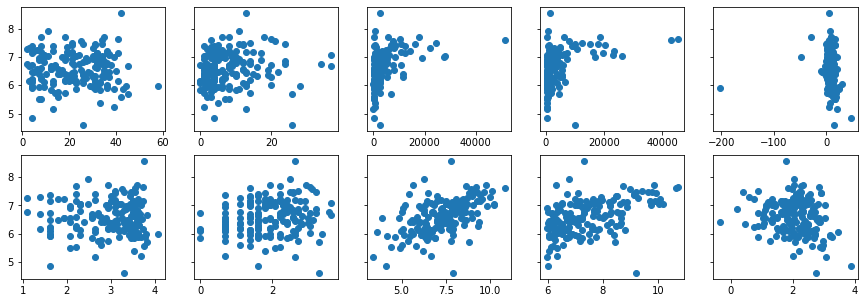

In [25]:
fig, ((ax1,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,sharey=True,figsize=(15,5))

ax1.scatter(df_salarioCEO_ajustada['anos_empresa'],df_salarioCEO_ajustada['ln_salario'])
ax2.scatter(df_salarioCEO_ajustada['anos_como_ceo'],df_salarioCEO_ajustada['ln_salario'])
ax3.scatter(df_salarioCEO_ajustada['vendas_totais'],df_salarioCEO_ajustada['ln_salario'])
ax4.scatter(df_salarioCEO_ajustada['valuation'],df_salarioCEO_ajustada['ln_salario'])
ax5.scatter(df_salarioCEO_ajustada['margem'],df_salarioCEO_ajustada['ln_salario'])

ax6.scatter(df_salarioCEO_ajustada['ln_anos_empresa'],df_salarioCEO_ajustada['ln_salario'])
ax7.scatter(df_salarioCEO_ajustada['ln_anos_como_ceo'],df_salarioCEO_ajustada['ln_salario'])
ax8.scatter(df_salarioCEO_ajustada['ln_vendas_totais'],df_salarioCEO_ajustada['ln_salario'])
ax9.scatter(df_salarioCEO_ajustada['ln_valuation'],df_salarioCEO_ajustada['ln_salario'])
ax10.scatter(df_salarioCEO_ajustada['ln_margem'],df_salarioCEO_ajustada['ln_salario']);

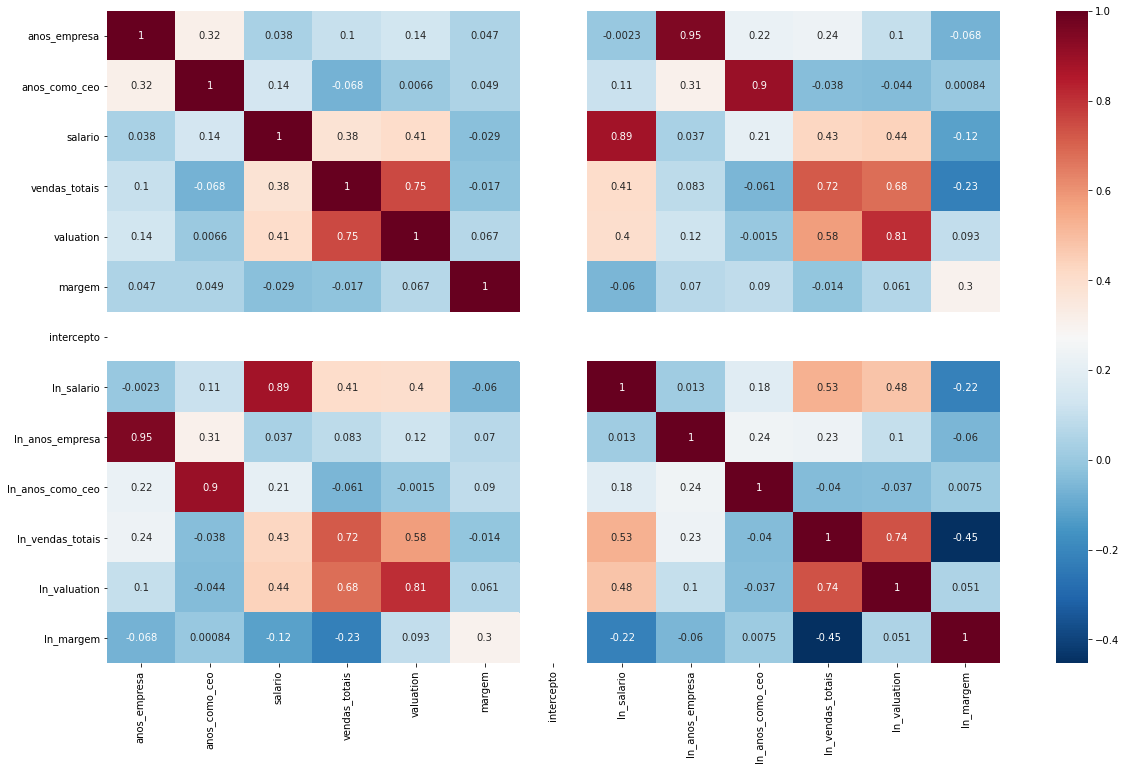

In [26]:
fig = plt.figure(figsize=(20,12))
sns.heatmap(df_salarioCEO_ajustada.corr(),cmap='RdBu_r',annot=True);

Pela análise do gráfico de dispersão, a correlação entre a variável resposta "ln_salario" com as variáveis explicativas "ln_vendas_totais" e "ln_valuation" aparenta ser estatisitcamente relevante.  
Vemos isso também no mapa de calor das correlações.

**<span style="color:red">Comentários Itano</span>**<br>
* Muito bom ter considerado a análise gráfica e a correlação!
</span>

#### AJUSTE 4: Modelo considerando todas as possíveis variáveis com seus valores em LOG

In [26]:
# Variável resposta
y_ajuste_4 = df_salarioCEO_ajustada['ln_salario']

# Variáveis explicativas
x_ajuste_4 = df_salarioCEO_ajustada[ ['intercepto', 'ln_anos_empresa', 'ln_anos_como_ceo', 'ln_vendas_totais', 'ln_valuation', 'ln_margem'] ]

# Ajusta o modelo e retorna os resultados
modelo_ajuste_4 = sm.OLS(y_ajuste_4, x_ajuste_4)
resultado_ajuste_4 = modelo_ajuste_4.fit()
print(resultado_ajuste_4.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_salario   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     20.01
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.10e-15
Time:                        18:47:19   Log-Likelihood:                -121.47
No. Observations:                 177   AIC:                             254.9
Df Residuals:                     171   BIC:                             274.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercepto           4.7059      0.322  

__Interpretação do modelo com o ajuste 4__

A equação de regressão linear encontrada considerando os dados disponibilizados, e seguindo o modelo inicial proposta pela consultoria é:  
Y(ln_salario) = 4,71 - 0,14* ln_anos_empresa + 0,19* ln_anos_como_ceo + 0,16* ln_vendas_totais + 0,13* ln_valuation - 0,07* ln_margem

Análise das variáveis:
1. __Intercepto__ = 111,05 (EXP de 4,71) é o salário médio de um CEO novo na empresa, sem nenhum ano como ceo e que tenha vendas totais, valuation e margem considerandos como zero  
2. __anos de empresa__ = no aumento de 1% nos anos de empresa, o salário diminui em 1,14%, mantendo-se as outra variáveis constantes. O sinal do coeficiente da variável "ln_anos_empresa" não está conforme esperado (esperava-se que anos de empresa aumentassem o salário)
3. __anos como CEO__ = no aumento de 1% nos anos como CEO, o salário aumenta em 0,19%, mantendo-se as outra variáveis constantes. O sinal do coeficiente da variável "ln_anos_como_CEO" está conforme esperado
4. __vendas totais__ = no aumento de 1% na unidade de vendas, o salário aumenta em 0,16%, mantendo-se as outra variáveis constantes. O sinal do coeficiente da variável "ln_vendas_totais" está conforme esperado
5. __valuation__ = no aumento de 1% na unidade de valuation, o salário aumenta em 0,13%, mantendo-se as outra variáveis constantes. O sinal do coeficiente da variável "ln_valuation" está conforme esperado, no entanto o valor de acrésimo é muito pequeno
6. __margem__ = no aumento de 1% na unidade de margem, o salário diminui em 0,07%, mantendo-se as outra variáveis constantes. O sinal do coeficiente da variável "ln_margem", apesar de estar conforme a correlação calculada, não parece estar de acordo com o que a lógica nos diz (esperava-se que maiores margens indicassem um salário maior)


O modelo apresenta um R2 ajustado de 0,351. Isso indica que o poder de explicação do modelo com as variáveis propostas pela consultoria em LOG ainda é fraco (cerca de 35%).  

Sobre os p valores encontrados temos as análises abaixo:  
__OBS.__: lembrando que a hipótese nula (H0) do teste é se o coeficiente é igual a zero na população, assim se a hipótese for plausível a variável explicativa não tem contribuição no modelo. Vamos considerar como sendo um H0 plausível p valores maiores que 0,05
1. __ln anos de empresa__ = p valor igual a 0,016, hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
2. __ln anos como CEO__ = p valor igual a 0,000 hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
3. __ln vendas totais__ = p valor igual a 0,008, hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
4. __ln valuation__ = p valor igual a 0,046, hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
5. __ln margem__ = p valor igual a 0,419, hipótese nula plausível (estatisticamente a variável não contribui para o modelo)

Ou seja, pela análise dos P valores de cada variável, chegamos à conclusão de que a variável "ln_margem" estatisticamente não contribui para o modelo.  
Além disso, a variável "ln_anos_de_empresa" está apresentando um sinal invertido, também vamos retirar ela do modelo
A seguir vamos estudar a retirada das mesmas do modelo e avaliar o impacto no R2 ajustado.

**<span style="color:red">Comentários Itano</span>**<br>
* Sobre a interpretação, é mais comum fazermos apenas no modelo final, mas achei bom para exercitar. Porém, a interpretação do Intercepto é o salário médio de um CEO com zero ln de anos de empresa, zero ln de anos como CEO, zero ln de vendas totais, zero ln de valuation e zero ln de margem. Quando fazemos a transformação, ganhamos por um lado em desempenho do modelo, mas por outro, perdemos em interpretabilidade.
* Interessante a análise do R2, pois apesar de continuar baixo, a transformação permitiu praticamente dobrar esse valor.
* Ótima análise de significância dos coeficientes!
</span>

#### AJUSTE 5: Removendo a variável "ln_margem" do modelo

In [27]:
# Variável resposta
y_ajuste_5 = df_salarioCEO_ajustada['ln_salario']

# Variáveis explicativas
x_ajuste_5 = df_salarioCEO_ajustada[ ['intercepto', 'ln_anos_empresa', 'ln_anos_como_ceo', 'ln_vendas_totais', 'ln_valuation'] ]

# Ajusta o modelo e retorna os resultados
modelo_ajuste_5 = sm.OLS(y_ajuste_5, x_ajuste_5)
resultado_ajuste_5 = modelo_ajuste_5.fit()
print(resultado_ajuste_5.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_salario   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     24.90
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           2.81e-16
Time:                        18:47:19   Log-Likelihood:                -121.81
No. Observations:                 177   AIC:                             253.6
Df Residuals:                     172   BIC:                             269.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercepto           4.5855      0.286  

Com a retirada da variável "ln_anos_empresa", a variável "ln_valuation" passou a apresentar um hipótese nula plausível, deixando assim de ser estatisticamente relevante para o modelo, vamos retirá-la para vermos o resultado.

#### AJUSTE 6: Removendo as variáveis "ln_margem" e "ln_valuation" do modelo

In [28]:
# Variável resposta
y_ajuste_6 = df_salarioCEO_ajustada['ln_salario']

# Variáveis explicativas
x_ajuste_6 = df_salarioCEO_ajustada[ ['intercepto', 'ln_anos_empresa', 'ln_anos_como_ceo', 'ln_vendas_totais'] ]

# Ajusta o modelo e retorna os resultados
modelo_ajuste_6 = sm.OLS(y_ajuste_6, x_ajuste_6)
resultado_ajuste_6 = modelo_ajuste_6.fit()
print(resultado_ajuste_6.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_salario   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     31.41
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           2.92e-16
Time:                        18:47:20   Log-Likelihood:                -123.76
No. Observations:                 177   AIC:                             255.5
Df Residuals:                     173   BIC:                             268.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercepto           4.9091      0.235  

#### AJUSTE 7: Removendo as variáveis "ln_margem", "ln_valuation" e "ln_anos_empresa" do modelo

In [29]:
# Variável resposta
y_ajuste_7 = df_salarioCEO_ajustada['ln_salario']

# Variáveis explicativas
x_ajuste_7 = df_salarioCEO_ajustada[ ['intercepto', 'ln_anos_como_ceo', 'ln_vendas_totais'] ]

# Ajusta o modelo e retorna os resultados
modelo_ajuste_7 = sm.OLS(y_ajuste_7, x_ajuste_7)
resultado_ajuste_7 = modelo_ajuste_7.fit()
print(resultado_ajuste_7.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_salario   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     41.46
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.88e-15
Time:                        18:47:20   Log-Likelihood:                -127.75
No. Observations:                 177   AIC:                             261.5
Df Residuals:                     174   BIC:                             271.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercepto           4.6357      0.218  

### Interprete os coeficientes do novo modelo utilizando as variáveis transformadas em termos do problema de negócio.

`Dica :` A interpretação de modelos que usam log mudam. Veja o resumo na tabela abaixo para guiar a interpretação dos coeficientes do modelo.

<p align='left'><img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/interpretacao_beta.png"></p>

__Interpretação do modelo com o ajuste 7__

A equação de regressão linear otimizada considerando os dados disponibilizados é:  
Y(ln_salario) = 4,64 + 0,16* ln_anos_como_ceo + 0,23* ln_vendas_totais

Análise das variáveis:
1. __Intercepto__ = 103,54 (EXP de 4,64) é o salário médio de um CEO novo na empresa, sem nenhum ano como ceo e que tenha vendas totais, valuation e margem considerandos como zero  
2. __anos como CEO__ = no aumento de 1% nos anos como CEO, o salário aumenta em 0,16%, mantendo-se as outra variáveis constantes. O sinal do coeficiente da variável "ln_anos_como_CEO" está conforme esperado
3. __vendas totais__ = no aumento de 1% na unidade de vendas, o salário aumenta em 0,23%, mantendo-se as outra variáveis constantes. O sinal do coeficiente da variável "ln_vendas_totais" está conforme esperado

Sobre os p valores das variáveis mantidas no modelo, encontramos temos as análises abaixo:  
__OBS.__: lembrando que a hipótese nula (H0) do teste é se o coeficiente é igual a zero na população, assim se a hipótese for plausível a variável explicativa não tem contribuição no modelo. Vamos considerar como sendo um H0 plausível p valores maiores que 0,05
1. __ln anos de empresa__ = p valor igual a 0,000, hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
2. __ln anos como CEO__ = p valor igual a 0,001 hipótese nula não plausível (estatisticamente a variável contribui para o modelo)
3. __ln vendas totais__ = p valor igual a 0,000, hipótese nula não plausível (estatisticamente a variável contribui para o modelo)

___CONCLUSÃO___  
O modelo apresenta um R2 ajustado de 0,315. Isso indica que o poder de explicação do modelo ainda é fraco (cerca de 32%), mesmo usando as variáveis em LOG e retirando aquelas que apresentavam um sinal invertido ao esperado e também as variáveis estatisticamente não representativas para o modelo.
É necessário uma nova interação com a equipe do negócio para verificar outras variáveis que possam incrementar o R2, ou seja, aumentar o poder explicativo do modelo.

**<span style="color:red">Comentários Itano</span>**<br>
Ótimo trabalho Leo!!

Como comentários finais:
* Verifique a interpretação do Intercepto quando utilizamos as variáveis explicativas com transformação log.
* O notebook está muito bem comentado, com o resultado das análises realizadas.
* Ter uma conclusão também é ótimo! Como Cientistas de Dados estaremos sempre apoiados pelos analistas de negócios.
</span>